# Case study - Google Data Analytics Professional Certificate




### How does a bike-share navigate speedy success?

This case study serves as the capstone project for earning the Google Data Analytics Professional Certificate, offered by Google through the Coursera platform.

#### Scenario
You are a junior data analyst on the marketing team at Cyclistic, a bike-share company based in Chicago. The director of marketing believes that the company’s future success hinges on increasing the number of annual memberships. To achieve this, your team aims to understand the differences in how casual riders and annual members use Cyclistic bikes. These insights will be crucial in designing a new marketing strategy aimed at converting casual riders into annual members. However, before proceeding, Cyclistic executives need to approve your recommendations, which must be supported by compelling data insights and professional data visualizations.

#### Key Question
How do annual members and casual riders use Cyclistic bikes differently?

The data is in a cloud, from where I downloaded the previous 12 months of Cyclistic’s trip records (from July 2024 to July 2023). Then the data was stored in my local computer

The data is organized by month, so it is distributed in 13 folders in a format .zip. After extracting all the 13 files in format .csv to a single folder in my local computer, I proceeded to merge all the data in a single file to make the analysis easier. For that, I preferred to use a script written in Pandas (Python).

Now that I have a single file, I am able to assess the credibility of the data, how it's organized, and see the description of the dataframe.


In [2]:
import pandas as pd

In [3]:
#read the file using pandas and assign it into a variable
data = pd.read_csv("cyclistic_merged.csv", sep=",")
data.sample()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
2420591,E67B9331CD5479DA,classic_bike,2023-10-22 10:04:05,2023-10-22 10:38:21,Clark St & Montrose Ave,KA1503000022,Rush St & Cedar St,KA1504000133,41.961588,-87.666036,41.902309,-87.627691,casual


In [4]:
#Get the shape of the dataframe
data.shape

(6483343, 13)

After merging all the 13 tables into one single file, I dispose now of a csv file with more than *6 millions rows (6.483.343) with 13 collumns.*

Let's have a look at the columns and what it contains

In [5]:
data.sample(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
3070854,B9920CAEDE41486B,classic_bike,2023-11-08 08:13:49,2023-11-08 10:40:30,Clarendon Ave & Gordon Ter,13379,Sheridan Rd & Irving Park Rd,13063,41.957867,-87.649505,41.954245,-87.654406,casual
3426378,E388E51B91E34765,electric_bike,2024-01-03 07:57:08,2024-01-03 08:09:32,Damen Ave & Pierce Ave,TA1305000041,NaN,NaN,41.909366,-87.677718,41.890000,-87.660000,member
3309999,FDCC909C999FCC8A,electric_bike,2023-12-05 08:43:49,2023-12-05 09:03:02,Damen Ave & Clybourn Ave,13271,Canal St & Madison St,13341,41.931904,-87.677783,41.882409,-87.639767,member
5566807,7AD93F674443D00B,classic_bike,2024-06-22 15:44:16.362,2024-06-22 16:44:07.664,Montrose Harbor,TA1308000012,LaSalle St & Illinois St,13430,41.963982,-87.638181,41.890762,-87.631697,casual
5687033,7254DE5CED85772A,electric_bike,2024-06-20 06:40:45.508,2024-06-20 06:58:35.458,NaN,NaN,NaN,NaN,41.930000,-87.650000,41.880000,-87.640000,member


### **Data's integrity**

Before cleaning the data, we must assess the consistency/integrity of the data. To do so, we will check for:
1. Missing Values
2. Check for Duplicates
3. Validate Data Types 
4. Assess Data Consistency
5. Validate Referential Integrity
6. Examine Statistical Summaries
7. Check for Data Anomalies or Outliers


In [6]:
#1 Checking for missing values
missing_values = data.isnull().sum()
print(missing_values)

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name    1069968
start_station_id      1069968
end_station_name      1119780
end_station_id        1119780
start_lat                   0
start_lng                   0
end_lat                  9010
end_lng                  9010
member_casual               0
dtype: int64


We can see that **"start_station_name", "start_station_id", "end_station_name", "end_station_id", "end_lat", and "end_lng"** have a lot of missing values. However, they are not important to answer the business task so they will this columns will be dropped during the cleaning. 

In [7]:
#2 Checking for duplicates

duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


There is no duplicates in the dataframe. 

In [8]:
#3. Validate Data Types 
data.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [9]:
data.sample(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
328857,9C6D25E4A00D4BCD,classic_bike,2023-07-17 18:14:22,2023-07-17 18:21:44,Clark St & Armitage Ave,13146,Sheffield Ave & Webster Ave,TA1309000033,41.918306,-87.636282,41.921540,-87.653818,member
3680634,844969F11BA41499,electric_bike,2024-02-24 11:33:49,2024-02-24 11:45:53,Winchester Ave & Elston Ave,KA1504000140,NaN,NaN,41.924086,-87.676556,41.910000,-87.650000,casual
4497297,8661AF61E9F2BBFA,classic_bike,2024-05-17 09:46:53,2024-05-17 09:52:57,Kimbark Ave & 53rd St,TA1309000037,University Ave & 57th St,KA1503000071,41.799272,-87.595008,41.791478,-87.599861,member
6084608,CC5B69C9982C7F14,classic_bike,2024-07-14 20:12:21.237,2024-07-14 20:17:49.780,Campbell Ave & Montrose Ave,15623,Rockwell St & Eastwood Ave,KA1504000093,41.961524,-87.691177,41.965900,-87.693638,member
6409724,9D81642D9E3D4E09,classic_bike,2024-07-22 09:02:06.481,2024-07-22 09:11:11.698,Campbell Ave & Montrose Ave,15623,Paulina St & Montrose Ave,TA1309000021,41.961524,-87.691177,41.961507,-87.671387,member


We can see that some columns have not the right type of data. "Ride_id", "rideable_type", "start_station_name", "start_station_id", "end_station_name", "end_station_id", and "member_casual" should all be of **string** type. Also, "started_at" and "ended_at" should be **datetime** type. Let's convert them. 

In [10]:
#assign the columns to a variable 
cols_obj_to_str = ['ride_id','rideable_type','start_station_name','start_station_id','end_station_name','end_station_id','member_casual']

#convert the variable from object to string using a for loop
for col in cols_obj_to_str:
    data[col] = data[col].astype(pd.StringDtype())

#print the dtypes to see if they are converted
data.dtypes


ride_id                string
rideable_type          string
started_at             object
ended_at               object
start_station_name     string
start_station_id       string
end_station_name       string
end_station_id         string
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          string
dtype: object

In [11]:
#assign the columns to a variable 
cols_obj_to_date = ['started_at','ended_at']

#convert the variable from object to string using a for loop
for col in cols_obj_to_date:
    data[col] = pd.to_datetime(data[col])

#print the dtypes to see if they are converted
data.dtypes

ride_id                       string
rideable_type                 string
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            string
start_station_id              string
end_station_name              string
end_station_id                string
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 string
dtype: object

Now, all columns have the correct data type

Let's pass to check the consistency of data

In [12]:
# 4 Assess Data Consistency
data['ride_id'].str.len()

0          16
1          16
2          16
3          16
4          16
           ..
6483338    16
6483339    16
6483340    16
6483341    16
6483342    16
Name: ride_id, Length: 6483343, dtype: Int64

The majority of entries in "ride_id" columns seems to be 16 characters longer. Now we must see if there is entries with length different from 16 

In [13]:
#Assign the current lenght of 16 in the dataframe
length = data['ride_id'].str.len()
sum(length != 16) 

0

There is no entries with more or less than 16 caracters so it's consistent. 

We are going to skip the **5. Validate Referential Integrity** step since we don't have any relantionship between tables so there's no primary and foreign keys to validate. 

In [14]:
#6. Examine Statistical Summaries
data.describe()

,start_lat,start_lng,end_lat,end_lng
count,6.483343e+06,6.483343e+06,6.474333e+06,6.474333e+06
mean,4.190304e+01,-8.764656e+01,4.190343e+01,-8.764680e+01
std,4.488528e-02,2.730491e-02,5.123858e-02,4.929987e-02
min,4.163000e+01,-8.794000e+01,0.000000e+00,-1.440500e+02
25%,4.188103e+01,-8.766000e+01,4.188103e+01,-8.766000e+01
50%,4.189897e+01,-8.764319e+01,4.189993e+01,-8.764335e+01
75%,4.193000e+01,-8.762956e+01,4.193000e+01,-8.762963e+01
max,4.207000e+01,-8.746000e+01,8.796000e+01,0.000000e+00


We can see that the summary stats has no sense since it uses only the data that we are going to drop in the cleaning phase. 

Let's pass to the last step.

<AxesSubplot:>

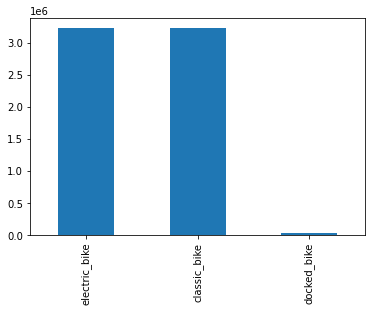

In [15]:
#Check for Data Anomalies or Outliers

#starting with types of bikes
bikes = data['rideable_type'].value_counts()
bikes.plot(kind='bar')

In [16]:
#Let's check more about the docked_bike types
docked = data['rideable_type'] == 'docked_bike'
print(docked.value_counts())

False    6448962
True       34381
Name: rideable_type, dtype: Int64


<AxesSubplot:>

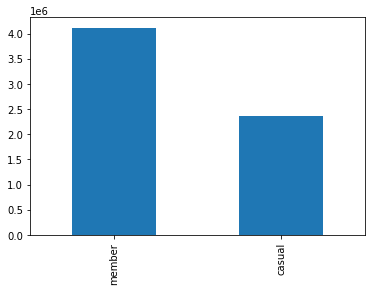

In [17]:
#now with members type 
members_types = data['member_casual'].value_counts()
members_types.plot(kind='bar')

Since there is not so many outliers, we can conclude that the data integrity is assured and we can move to the cleaning phase of the analysis

### **Cleaning the data**

Since we don't have duplicates in the data frame, there is no need to drop any rows for a start. But we must drop the columns that we will not use to answer the business task. The columns that we must drop are **"start_station_name", "start_station_id", "end_station_name", "end_station_id", "start_lat", "start_lng", "end_lat", and "end_lng"**. 

In [18]:
#assigning the columns to drop to a variable
columns_to_drop = ["start_station_name", "start_station_id", "end_station_name", "end_station_id", "start_lat", "start_lng", "end_lat", "end_lng"]

#droping the columns 
data = data.drop(columns=columns_to_drop)

#getting a sample
data.sample(5)

,ride_id,rideable_type,started_at,ended_at,member_casual
5694691,C84227200BA7AC1F,electric_bike,2024-06-30 00:33:48.241,2024-06-30 00:34:08.774,member
3862691,3571EA6F4E1A1AEF,electric_bike,2024-03-28 11:53:25.000,2024-03-28 12:00:46.000,member
1526636,A49BE4C0996D2846,electric_bike,2023-08-19 01:28:46.000,2023-08-19 01:31:39.000,member
889576,01C24ACAB17DDAE2,classic_bike,2023-08-20 11:00:19.000,2023-08-20 11:17:12.000,member
4328171,DA0BF5F255C12C02,classic_bike,2024-04-28 12:57:19.000,2024-04-28 13:05:07.000,casual


Great! We have dropped the columns that are not useful for the analysis. We could of course drop also the "ride_id" column, but it would have blocked the marketing team to identify which user biked using the Cyclistic system. 

Now, let's create a new column 'ride_length' by subtracting the column 'started_at' from the 'column ended_at'

In [28]:
#create new columns 'ride_length' 
data['ride_length'] = data['ended_at'] - data['started_at']


#print a sample
data.sample(5)

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length,ride_length_minutes
5563392,40D6C2845E1E4199,classic_bike,2024-06-05 23:24:40.138,2024-06-05 23:36:39.743,member,0 days 00:11:59.605000,-11.993417
4814026,2AB64F1B164EF125,electric_bike,2024-05-22 14:22:26.000,2024-05-22 14:22:48.000,member,0 days 00:00:22,-0.366667
1778784,6040F9DA3389667B,classic_bike,2023-09-02 23:33:40.000,2023-09-03 00:22:17.000,casual,0 days 00:48:37,-48.616667
5602097,9F65820385A65ACA,electric_bike,2024-06-15 15:00:24.789,2024-06-15 15:59:29.527,casual,0 days 00:59:04.738000,-59.078967
6016806,9582F01ED09835FF,electric_bike,2024-07-01 14:54:53.413,2024-07-01 15:24:03.700,member,0 days 00:29:10.287000,-29.171450


In [32]:
data['ride_length_hours'] = (data['ride_length'].dt.total_seconds() / 3600).round(2)
data.sample(5)

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length,ride_length_minutes,ride_length_hours
3282738,34D45D7ECE2A038D,classic_bike,2023-12-07 11:35:54,2023-12-07 11:38:18,member,0 days 00:02:24,2.400000,0.04
180268,7FB4A14BD6D6F348,classic_bike,2023-07-01 16:44:21,2023-07-01 22:22:54,casual,0 days 05:38:33,338.550000,5.64
2741749,BB56A7317B167112,electric_bike,2023-10-23 19:26:05,2023-10-23 19:34:08,casual,0 days 00:08:03,8.050000,0.13
4791749,7F69B910E0E91EB7,classic_bike,2024-05-19 13:34:27,2024-05-19 15:38:03,casual,0 days 02:03:36,123.600000,2.06
66114,517C3247BF5A82FF,electric_bike,2023-07-13 18:40:33,2023-07-13 18:49:08,casual,0 days 00:08:35,8.583333,0.14


In [34]:
# Function to format Timedelta as HH:MM:SS
def format_timedelta(td):
    total_seconds = td.total_seconds()
    hours, remainder = divmod(total_seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    return f"{int(hours):02}:{int(minutes):02}:{int(seconds):02}"

# Apply the function to the 'ride_length' column
data['ride_length_formatted'] = data['ride_length'].apply(format_timedelta)

#print a sample
data.sample(5)


,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length,ride_length_minutes,ride_length_hours,ride_length_formatted
3256855,017FFACCED6F287C,electric_bike,2023-12-05 16:45:02,2023-12-05 16:49:23,member,0 days 00:04:21,4.350000,0.07,00:04:21
1380391,16D928FC00B5F258,classic_bike,2023-08-19 09:25:30,2023-08-19 09:34:38,casual,0 days 00:09:08,9.133333,0.15,00:09:08
775260,724CF9DA6084C7D2,classic_bike,2023-08-08 20:47:25,2023-08-08 20:57:32,member,0 days 00:10:07,10.116667,0.17,00:10:07
1183383,8F1906EDFA237379,electric_bike,2023-08-22 17:29:03,2023-08-22 17:37:22,casual,0 days 00:08:19,8.316667,0.14,00:08:19
714873,66CEC167B4581B3C,electric_bike,2023-07-16 23:28:07,2023-07-16 23:29:36,member,0 days 00:01:29,1.483333,0.02,00:01:29


Great! Now we can drop the "ride_length", "ride_length_minutes", and "ride_length_hours" since we discovered a better way to visualize the ride_length

In [37]:
#drop columns "ride_length", "ride_length_minutes", and "ride_length_hours" by assignt the columns to a variable 

cols_len_to_drop = ["ride_length","ride_length_minutes","ride_length_hours"]

#droping the columns 
data = data.drop(columns=cols_len_to_drop)

#print a sample
data.sample(5)

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length_formatted
710242,7D02935B69429BC7,electric_bike,2023-07-31 17:48:30,2023-07-31 17:59:28,member,00:10:58
4448263,7261AE6815357E5A,electric_bike,2024-05-01 15:43:04,2024-05-01 16:07:57,member,00:24:53
1891938,05F1182F40989064,classic_bike,2023-09-04 13:16:00,2023-09-04 13:18:54,member,00:02:54
2044448,BB1B96D3C1EC9AB5,electric_bike,2023-09-02 18:16:23,2023-09-02 18:38:11,member,00:21:48
932772,2599EDEA181283A2,classic_bike,2023-08-23 07:08:16,2023-08-23 07:23:34,member,00:15:18


Great! Now, we can create 2 new columns for "Year" and "Month"

In [38]:
#Creating a column for year 
data['Year'] = pd.DatetimeIndex(data['started_at']).year

#print a sample(5)
data.sample(5)

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length_formatted,Year
5354807,2D9C9CCD649FB857,classic_bike,2024-06-13 21:24:04.871,2024-06-13 22:09:19.914,casual,00:45:15,2024
1544687,7981A7FBDDAACF1C,electric_bike,2023-09-18 15:32:57.000,2023-09-18 15:39:43.000,member,00:06:46,2023
4588916,DFECC2A9F69AC2A5,classic_bike,2024-05-07 23:01:49.000,2024-05-07 23:04:44.000,member,00:02:55,2024
1575181,C8A741088A6F3929,electric_bike,2023-09-30 18:41:15.000,2023-09-30 18:44:47.000,casual,00:03:32,2023
4498323,839B1479004D8A97,electric_bike,2024-05-04 16:37:37.000,2024-05-04 16:43:50.000,casual,00:06:13,2024


In [39]:
#Creating a column for month 
data['Month'] = pd.DatetimeIndex(data['started_at']).month

#print a sample(5)
data.sample(5)

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length_formatted,Year,Month
2310256,9033AC83849ABF7B,classic_bike,2023-10-06 08:48:57.000,2023-10-06 08:53:09.000,member,00:04:12,2023,10
278988,971AAD2EA25CAA9A,electric_bike,2023-07-17 12:11:36.000,2023-07-17 12:14:02.000,casual,00:02:26,2023,7
5301431,2B8F2B0DE02C37F4,classic_bike,2024-06-05 17:16:24.624,2024-06-05 17:20:03.668,member,00:03:39,2024,6
230420,536BC321ED78885B,classic_bike,2023-07-05 08:47:34.000,2023-07-05 09:06:43.000,member,00:19:09,2023,7
219955,E8D32C491694D51A,electric_bike,2023-07-10 08:30:37.000,2023-07-10 08:41:28.000,casual,00:10:51,2023,7


It seems we have a good data frame to initiate our analysis! Let's save it into a new .csv file!

In [49]:
 #save it into a pdf
data.to_csv('results_clean.csv', encoding='utf8')

### Analysing phase 

In [1]:
#import the cleaned data assigned into a variable 
import pandas as pd
dataClean = pd.read_csv("results_clean.csv", sep=",")
dataClean.sample(5)

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length_formatted,Year,Month
1486082,1486082,2DBB012793BBABF1,electric_bike,2023-08-28 21:17:49,2023-08-28 21:23:19,member,00:05:30,2023,8
2499586,2499586,3309F85F76A3150E,electric_bike,2023-10-12 11:37:52,2023-10-12 11:51:39,member,00:13:47,2023,10
5290150,5290150,462F98F6AF6FBE23,electric_bike,2024-06-10 08:55:38.333,2024-06-10 09:00:35.260,member,00:04:56,2024,6
3492057,3492057,EBF3B924F2846922,classic_bike,2024-02-18 12:58:53,2024-02-18 13:02:45,member,00:03:52,2024,2
1382373,1382373,7C876CF29B2D5D5D,electric_bike,2023-08-28 19:07:13,2023-08-28 19:12:28,casual,00:05:15,2023,8


In [6]:
dataClean.groupby(['Year', 'Month']).sum()

Unnamed: 0
Year Month               
2023 7       294642877425
     8       890144788728
     9      1247798355888
     10     1328962582510
     11     1060033627289
     12      720928212813
2024 1       492836794542
     2       800237650590
     3      1160981478726
     4      1745866576350
     5      2877290056177
     6      3823277347892
     7      4573864637223